In [15]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [16]:

df = pd.read_csv('str/JAPON ACT.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       200 non-null    int64  
 1   Month      200 non-null    int64  
 2   Day        200 non-null    int64  
 3   Time       200 non-null    object 
 4   Lat        200 non-null    float64
 5   Lon        200 non-null    float64
 6   Depth      200 non-null    float64
 7   Mag        200 non-null    float64
 8   Region     200 non-null    object 
 9   Timestamp  200 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 15.8+ KB


In [18]:
# Convertir el campo 'Time' en un objeto datetime y crear una nueva columna 'Fecha'
df['Time'] = pd.to_datetime(df['Time'])
df['Fecha'] = df['Time'].dt.date


/tmp/ipykernel_5166/3754892676.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [20]:

#  Convertir los campos Year, Month y Day en una nueva columna 'Fecha' en formato datetime
df['Fecha'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Convertir la columna 'Time' en un objeto datetime y agregarla a la columna 'Fecha'
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f')
df['Fecha'] = df['Fecha'] + pd.to_timedelta(df['Time'].dt.strftime('%H:%M:%S.%f'))

# Eliminar las columnas Year, Month, Day y Time
df = df.drop(['Year','Month', 'Day', 'Time'], axis=1)

# Convertir la columna 'Fecha' en formato ISO 8601 (YYYY-MM-DD)
df['Fecha'] = df['Fecha'].dt.strftime('%Y-%m-%d')


In [21]:
df = df.rename(columns={'Mag': 'Magnitud','Depth':'profundidad'})

In [22]:

# Filtrar las filas que contienen la palabra 'japon' en la columna 'Region'
filtro = df['Region'].str.contains('japan', case=False)
df = df[filtro]

# Limpiar la columna 'Region' eliminando información redundante
df['Region'] = df['Region'].str.replace('Earthquake', '').str.strip()


In [23]:
# Aplicar normalización de datos a las columnas 'Lat' y 'Lon'
df['Lat'] = (df['Lat'] - df['Lat'].mean()) / df['Lat'].std()
df['Lon'] = (df['Lon'] - df['Lon'].mean()) / df['Lon'].std()

In [24]:
df.head(10)

,Year,Lat,Lon,profundidad,Magnitud,Region,Timestamp,Fecha
0,2023,-0.103377,-1.423888,8.8,4.9,"47 km ENE of Anamizu, Japan",1683576858,2023-05-08
1,2023,-0.168261,-0.481128,127.6,4.3,"33 km NW of Nasushiobara, Japan",1683511500,2023-05-08
2,2023,1.053222,0.330234,62.3,5.9,"Hokkaido, Japan region",1683308836,2023-05-05
3,2023,1.451036,1.906990,35.6,4.5,"off the coast of Hokkaido, Japan",1683302508,2023-05-05
4,2023,-0.088670,-1.477468,10.6,4.4,"41 km NE of Anamizu, Japan",1683296330,2023-05-05
5,2023,-0.092354,-1.456036,8.2,5.6,"44 km NE of Anamizu, Japan",1683291483,2023-05-05
6,2023,0.459930,0.318950,61.8,4.7,"4 km SSE of Yamada, Japan",1683289494,2023-05-05
7,2023,-0.097094,-1.411467,10.0,4.6,"near the west coast of Honshu, Japan",1683275881,2023-05-05
8,2023,-0.078931,-1.445812,8.7,6.2,"49 km NE of Anamizu, Japan",1683265324,2023-05-05
10,2023,1.109853,1.202941,31.0,4.5,"105 km SE of Hiroo, Japan",1683079996,2023-05-03


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         153 non-null    int64  
 1   Lat          153 non-null    float64
 2   Lon          153 non-null    float64
 3   profundidad  153 non-null    float64
 4   Magnitud     153 non-null    float64
 5   Region       153 non-null    object 
 6   Timestamp    153 non-null    int64  
 7   Fecha        153 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 10.8+ KB


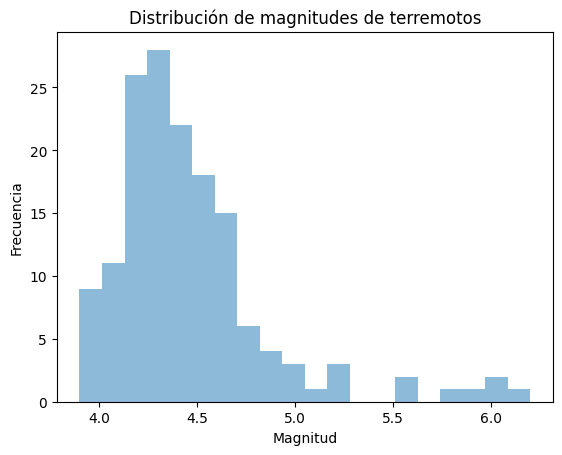

In [26]:
# Crear un histograma de la magnitud de los terremotos
plt.hist(df['Magnitud'], bins=20, alpha=0.5)
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de magnitudes de terremotos')
plt.show()

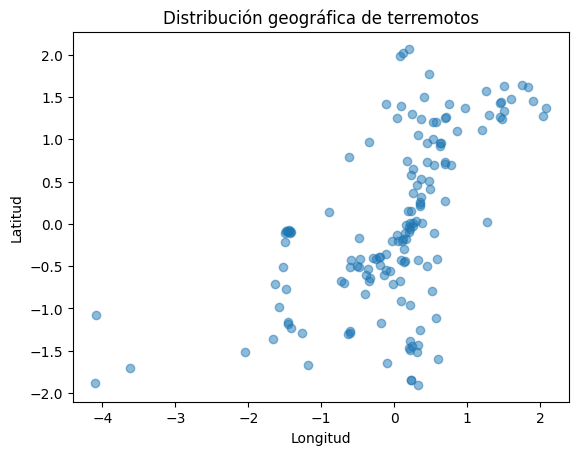

In [27]:
# Crear un gráfico de dispersión de la latitud y longitud de los terremotos
plt.scatter(df['Lon'], df['Lat'], alpha=0.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución geográfica de terremotos')
plt.show()

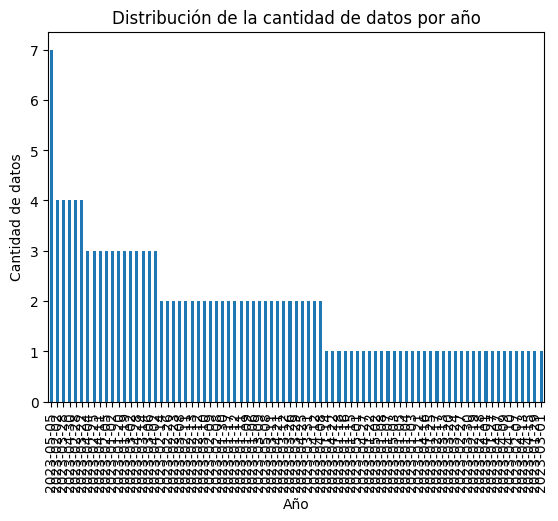

In [31]:
distribucion = df['Fecha'].value_counts()
distribucion.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Cantidad de datos')
plt.title('Distribución de la cantidad de datos por año')
plt.show()